<h1>NAISARGI SHAH</h1>
<h1>TSF GRIP JAN 2021</h1>
<h1>Data Science and Business Analytics</h1>
<h1>Task 2: Prediction using Unsupervised ML (K-means Clustering)</h1>

<h3>From the given iris dataset, Predict the optimum number of clusters and represent it visually.</h3>

<p>Iris is a flowering plant and in the given dataset, we have measured various features of the different iris flowers and recorded the results. The dataset consists of 150 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.</p>

In [14]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [18]:
#loading the iris dataset
iris_data = pd.read_csv("D:/Sparks/iris.csv")

In [20]:
#Lets look at our data
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<h5>We dont need the "Id" column in the dataset.</h5>

In [21]:
#removing the "Id" column using drop function
iris_data.drop(['Id'],axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<h5>Now, we train our data model. </h5>

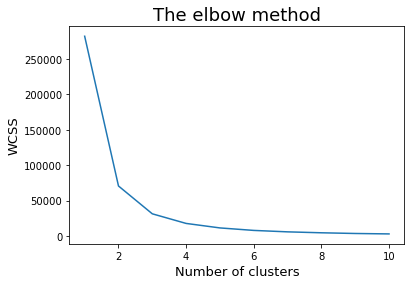

In [25]:
#considering all 4 features (sepal length, sepal width, petal length, and petal width) in a variable"x" to facilitate training
#of our model
x = iris_data.iloc[:,[0,1,2,3]].values

#finding the optimum number of clusters for k-means classification using "elbow method"
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#plotting the results on a line graph; allowing us to observe "The elbow"
plt.plot(range(1, 11), wcss)
plt.title('The elbow method', size=18)
plt.xlabel('Number of clusters', size=13)
plt.ylabel('WCSS', size=13)    #WCSS is short for "Within Cluster Sum of Squares"
plt.show()

<h5>In the above shown Elbow method, the shape of the elbow forms roughly around "3". So, the optimum number of clusters for k-means clustering is k = 3.</h5>

<h5>Lets implement k-means clustering with k=3</h5>

In [28]:
#applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [29]:
kmeans.cluster_centers_

array([[125.5  ,   6.588,   2.974,   5.552],
       [ 25.5  ,   5.006,   3.418,   1.464],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

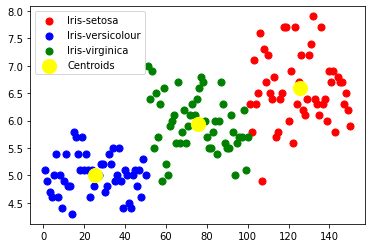

In [33]:
#visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 50, c = 'green', label = 'Iris-virginica')

#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

<h2>So, we conclude that yellow dots are the 3 centroids to the clusters formed on basis of given Iris dataset.</h2>